# Install

In [1]:
!pip install obspy
!pip install PyWavelets
!pip install tensorflow numpy matplotlib

   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.2 MB ? eta -:--:--
   --------- ------------------------------ 1.0/4.2 MB 3.9 MB/s eta 0:00:01
   ----------------- ---------------------- 1.8/4.2 MB 3.9 MB/s eta 0:00:01
   ------------------------ --------------- 2.6/4.2 MB 3.9 MB/s eta 0:00:01
   -------------------------------- ------- 3.4/4.2 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 4.2/4.2 MB 3.9 MB/s eta 0:00:00


# Omar Ibrahim Try

Detected SNR: 0.9344242329540231
No P-wave detected for XB.ELYSE.02.BHV


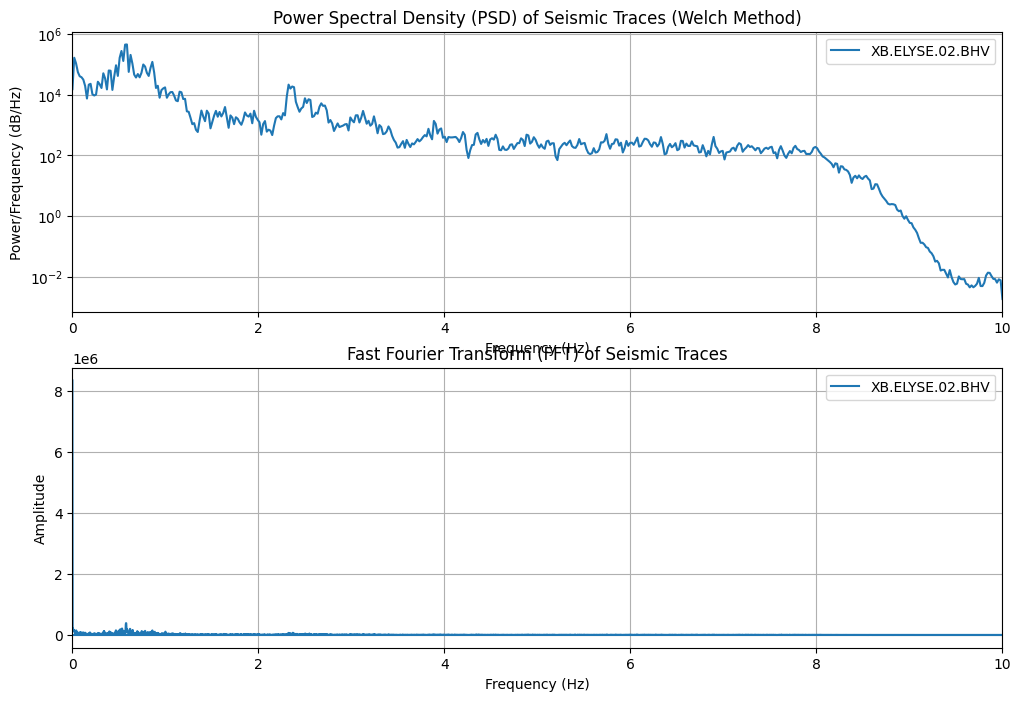

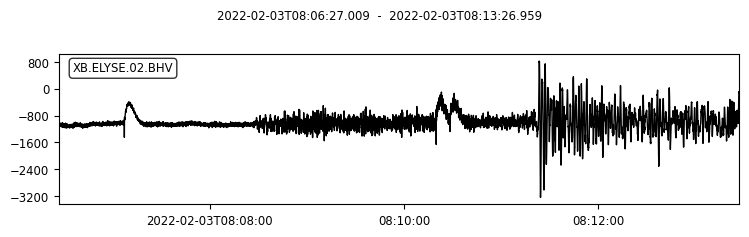

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from scipy.signal import welch
from obspy.signal.trigger import classic_sta_lta, trigger_onset
import pywt

client = Client("IRIS")

event_time = UTCDateTime("2022-02-03T08:08:27.000000")
start_time = event_time - 120
end_time = event_time + 300

network = "XB"
station = "ELYSE"
location = "*"
channel = "BHV"

st = client.get_waveforms(network, station, location, channel, start_time, end_time)


def wavelet_denoise(data, wavelet='db4', level=1):
    coeffs = pywt.wavedec(data, wavelet, mode='per')
    sigma = np.median(np.abs(coeffs[-level])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(data)))
    coeffs[1:] = (pywt.threshold(i, value=uthresh, mode='soft') for i in coeffs[1:])
    return pywt.waverec(coeffs, wavelet, mode='per')

def calculate_snr(trace, onset_index, pre_event_window, post_event_window):
    pre_event_start = max(0, onset_index - pre_event_window)
    pre_event_end = onset_index
    post_event_start = onset_index
    post_event_end = min(len(trace.data), onset_index + post_event_window)

    if pre_event_start >= pre_event_end or post_event_start >= post_event_end:
        return 0  # the windows are invalid

    noise_window = trace.data[pre_event_start:pre_event_end]
    signal_window = trace.data[post_event_start:post_event_end]
    noise_level = np.mean(np.abs(noise_window))
    signal_level = np.mean(np.abs(signal_window))

    if noise_level == 0:
        return 0

    snr = signal_level / noise_level
    return snr

def find_p_wave(trace, snr_threshold, pre_event_window, post_event_window):
    # wavelet denoising
    denoised_data = wavelet_denoise(trace.data)

    # Short-term average / Long-term average
    cft = classic_sta_lta(denoised_data, int(1 * trace.stats.sampling_rate), int(20 * trace.stats.sampling_rate))
    on_of = trigger_onset(cft, 3, 1.5)

    if len(on_of) > 0:
        onset_index = on_of[0][0]
        p_wave_time = trace.stats.starttime + onset_index / trace.stats.sampling_rate


        snr = calculate_snr(trace, onset_index, pre_event_window, post_event_window)
        print(f'Detected SNR: {snr}')

        if snr >= snr_threshold:
            return p_wave_time
        else:
            return None
    else:
        return None

snr_threshold = 1.25
pre_event_window = int(5 * st[0].stats.sampling_rate)
post_event_window = int(20 * st[0].stats.sampling_rate)

for i, trace in enumerate(st):
    p_wave_time = find_p_wave(trace, snr_threshold, pre_event_window, post_event_window)

    if p_wave_time:
        print(f'P-wave detected for {trace.id} at {p_wave_time}')
    else:
        print(f'No P-wave detected for {trace.id}')

def plot_psd(trace):
    data = trace.data
    sampling_rate = trace.stats.sampling_rate
    freqs, psd = welch(data, fs=sampling_rate, nperseg=1024)
    plt.semilogy(freqs, psd, label=trace.id)

def plot_fft(trace):
    data = trace.data
    sampling_rate = trace.stats.sampling_rate
    fft = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(data), d=1.0/sampling_rate)
    plt.plot(freqs, np.abs(fft), label=trace.id)

plt.figure(figsize=(12, 8))

# PSD
plt.subplot(2, 1, 1)
plot_psd(trace)
plt.title('Power Spectral Density (PSD) of Seismic Traces (Welch Method)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.xlim(0, 10)
plt.legend()
plt.grid()

# FFT
plt.subplot(2, 1, 2)
plot_fft(trace)
plt.title('Fast Fourier Transform (FFT) of Seismic Traces')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 10)
plt.legend()
plt.grid()

st[0].plot()
plt.tight_layout()
plt.show()

# Unrelated Work

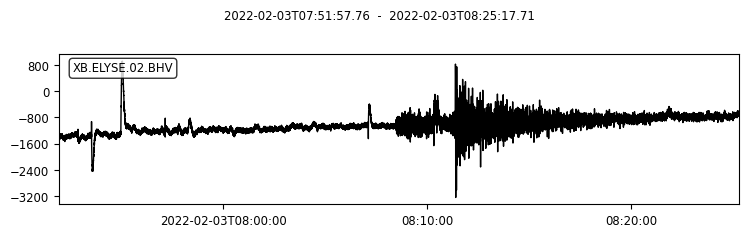

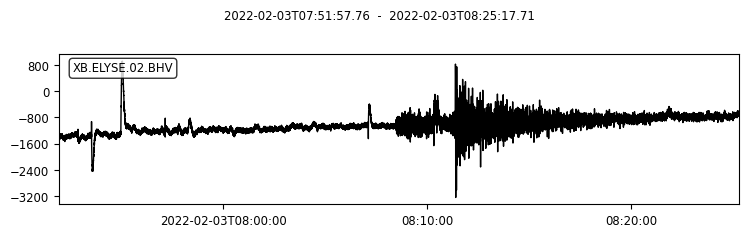

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS")
event_time = UTCDateTime("2022-02-03T08:08:37.713000")
start_time = event_time - 1000
end_time = event_time + 1000

network = "XB"
station = "ELYSE"
location = "*"
channel = "BHV"

st1 = client.get_waveforms(network, station, location, channel, start_time, end_time)
st1[0].plot()
#trace.plot()

**Glitch Algorithm**

In [6]:
!pip install StandardScaler

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 3.7 MB/s eta 0:00:00
  Created wheel for StandardScaler: filename=StandardScaler-0.5-py3-none-any.whl size=2608 sha256=e6d03aadb2a224860907ab365e3dab5b18e9e75909b0026ebcee2845bae9050a
  Stored in directory: c:\users\shara\appdata\local\pip\cache\wheels\fe\cf\ba\03416e6fb72a0105069c33d9bf5a2ec1af9a41fe57fa7ec554
Successfully built StandardScaler
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kfp 1.8.22 requires cloudpickle<3,>=2.0.0, but you have cloudpickle 3.0.0 which is incompatible.
kfp 1.8.22 requires pydantic<2,>=1.8.2, but you have pydantic 2.8.2 which is incompatible.
kfp 1.8.22 requires requests-toolbelt<1,>=0.8.0, but you have requests-toolbelt 1.0.0 which is incompatible.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Function to plot reconstruction error distribution
def plot_reconstruction_error(reconstruction_error):
    plt.figure(figsize=(10, 5))
    plt.hist(reconstruction_error, bins=50, color='blue', alpha=0.7)
    plt.title('Reconstruction Error Distribution')
    plt.xlabel('Reconstruction Error')
    plt.ylabel('Frequency')
    plt.show()

# Function to detect anomalies based on dynamic threshold
def detect_anomalies(autoencoder, data, factor=1):
    reconstructed_data = autoencoder.predict(data)
    reconstruction_error = np.mean(np.abs(data - reconstructed_data), axis=1)

    # Calculate dynamic threshold (mean + factor * std deviation)
    threshold = np.mean(reconstruction_error) + factor * np.std(reconstruction_error)
    print(f"Dynamic Threshold for Anomalies: {threshold}")

    # Detect anomalies where reconstruction error exceeds the threshold
    anomaly_indices = np.where(reconstruction_error > threshold)[0]

    # Plot the reconstruction error distribution
    plot_reconstruction_error(reconstruction_error)

    return anomaly_indices, reconstruction_error

# Plot the results with anomalies marked
def plot_with_anomalies(time_rel, data_windows, anomaly_indices, window_size):
    # Use the midpoint of each window for plotting the reduced time array
    time_rel_trimmed = time_rel[:len(data_windows)]  # Use the number of windows for time

    # For plotting, we can use the mean value of each window
    data_means = np.mean(data_windows, axis=1)

    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    ax.plot(time_rel_trimmed, data_means, label='Seismic Data (Window Means)')

    # Mark anomaly locations
    for anomaly in anomaly_indices:
        ax.axvline(x=time_rel_trimmed[anomaly], color='red', label='Anomaly')

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Velocity (m/s)')
    ax.set_title('Seismic Data with Anomalies (Glitches)')
    plt.show()

# Main function to use the Autoencoder for glitch detection
def main(st1):
    # Step 1: Get the seismic data from st1
    tr = st1[0]  # Assuming the stream contains a single trace
    observed_signal = tr.data  # Seismic data
    sampling_rate = tr.stats.sampling_rate
    time_rel = np.arange(0, len(observed_signal)) / sampling_rate  # Time in seconds

    # Step 2: Normalize the data
    scaler = StandardScaler()
    observed_signal_scaled = scaler.fit_transform(observed_signal.reshape(-1, 1)).flatten()

    # Step 3: Create windows of data for training
    window_size = 100  # Define a window size for Autoencoder input
    data_windows = create_windows(observed_signal_scaled, window_size)

    # Step 4: Build and train the Autoencoder
    autoencoder = build_autoencoder(window_size)
    autoencoder.fit(data_windows, data_windows, epochs=50, batch_size=128, shuffle=True, validation_split=0.1)

    # Step 5: Detect anomalies (glitches) using dynamic threshold based on reconstruction error
    anomaly_indices, reconstruction_error = detect_anomalies(autoencoder, data_windows, factor=3)

    # Step 6: Plot the original data with anomalies marked
    plot_with_anomalies(time_rel, data_windows, anomaly_indices, window_size)

# Example usage
if __name__ == "__main__":
    # Assuming st1 is already loaded with data from the seismic station
    # Example: st1 = client.get_waveforms(network, station, location, channel, start_time, end_time)

    main(st1)








NameError: name 'create_windows' is not defined

/usr/local/lib/python3.10/dist-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (10) of bandpass is at or above Nyquist (10.0). Applying a high-pass instead.
  warnings.warn(msg)


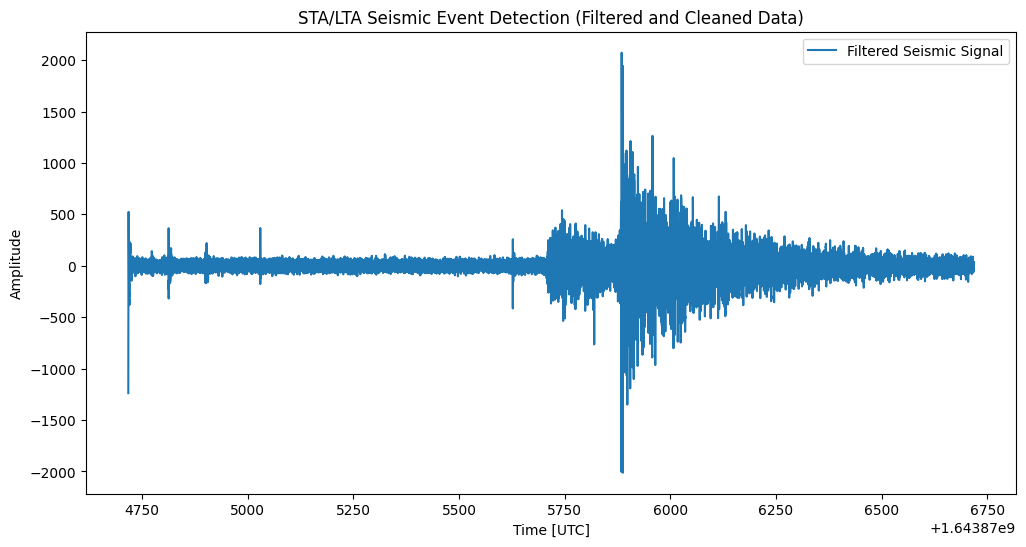

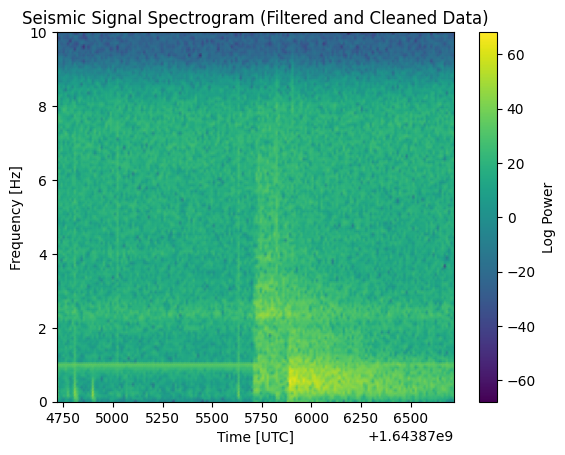

In [ ]:
def apply_filters(trace, highpass_freq=0.2, bandpass_min=0.1, bandpass_max=10):
    # High-pass filter to remove low-frequency noise
    trace_filt = trace.copy()
    trace_filt.filter('highpass', freq=highpass_freq)

    # Bandpass filter to remove high-frequency and low-frequency noise
    trace_filt.filter('bandpass', freqmin=bandpass_min, freqmax=bandpass_max)
    return trace_filt
tr_filtered = apply_filters(st1[0], highpass_freq=0.2, bandpass_min=0.1, bandpass_max=10)

# STA/LTA Parameters
sta = 1  # Short-term window in seconds
lta = 10  # Long-term window in seconds
df = tr_filtered.stats.sampling_rate

# Apply STA/LTA detection
cft = classic_sta_lta(tr_filtered.data, int(sta * df), int(lta * df))
on_thresh = np.max(tr_filtered.data) * 0.02
off_thresh = np.max(tr_filtered.data) * 0.01
triggers = trigger_onset(cft, on_thresh, off_thresh)

# Get time in UTC for the x-axis
times = tr_filtered.times("UTCDateTime")

# Plot STA/LTA Results
plt.figure(figsize=(12, 6))
plt.plot(times, tr_filtered.data, label="Filtered Seismic Signal")
for trigger in triggers:
    plt.axvline(times[int(trigger[0])], color='r', linestyle='--', label='Event Start')
    plt.axvline(times[int(trigger[1])], color='k', linestyle='--', label='Event End')
plt.title("STA/LTA Seismic Event Detection (Filtered and Cleaned Data)")
plt.xlabel("Time [UTC]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Spectrogram Calculation
f, t, Sxx = spectrogram(tr_filtered.data, fs=df)
times_color = np.linspace(start_time.timestamp, end_time.timestamp, Sxx.shape[1])

# Plot the Spectrogram
plt.pcolormesh(times_color, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title("Seismic Signal Spectrogram (Filtered and Cleaned Data)")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [UTC]")
plt.colorbar(label="Log Power")
plt.show()



**Checking STA/LTA**


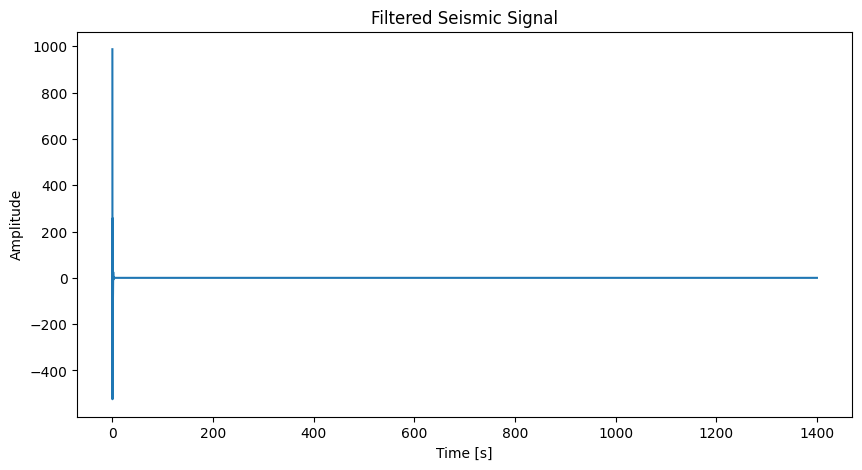

Min value: -524.3453107495352
Max value: 987.7276291063055


In [ ]:
# Plot the filtered seismic signal
plt.figure(figsize=(10, 5))
plt.plot(tr_filtered.times(), tr_filtered.data, label='Filtered Seismic Signal')
plt.title("Filtered Seismic Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()
print("Min value:", np.min(tr_filtered.data))
print("Max value:", np.max(tr_filtered.data))
# Apply STA/LTA to a smaller window of data
start_sample = 0   # Adjust these indices based on the segment of interest
end_sample = 10000
segment = tr_filtered.slice(tr_filtered.stats.starttime + start_sample / df,
                            tr_filtered.stats.starttime + end_sample / df)

# Reapply STA/LTA detection
cft = classic_sta_lta(segment.data, int(sta * df), int(lta * df))

KALMAN Filter + FIR filter for more stability

In [6]:
!pip install pykalman

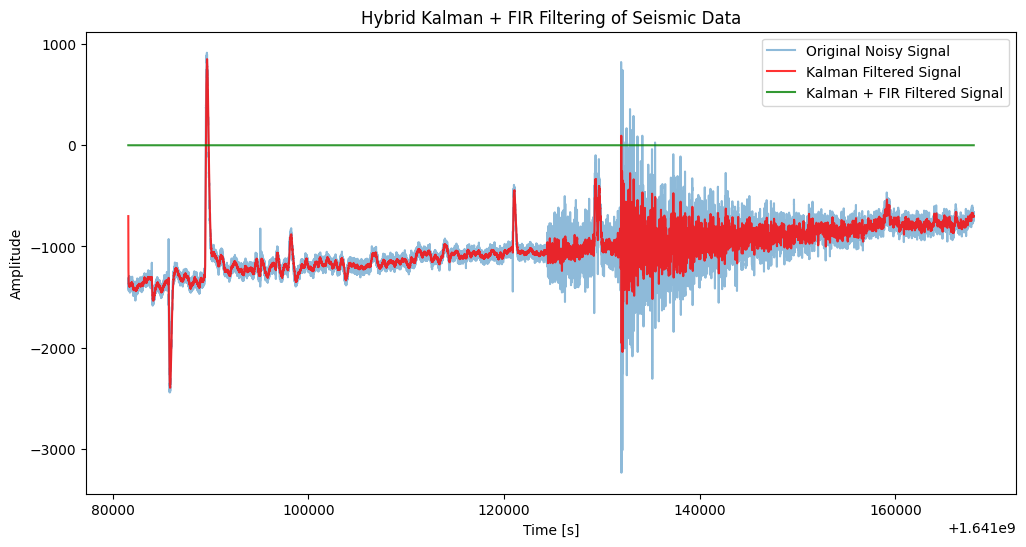

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
from scipy.signal import firwin, lfilter

# Assuming 'tr_filtered.data' is the noisy seismic signal
seismic_signal = st1[0].data
time = np.linspace(start_time.timestamp, end_time.timestamp, len(seismic_signal))


# Step 1: Apply Kalman Filter
kf = KalmanFilter(
    transition_matrices=[1],    # State transition matrix
    observation_matrices=[1],   # Observation matrix
    initial_state_mean=0,       # Initial estimate
    initial_state_covariance=1, # Initial uncertainty
    observation_covariance=1,   # Measurement noise
    transition_covariance=0.01  # Process noise
)

# Apply Kalman filter
state_means, _ = kf.filter(seismic_signal)

# Step 2: Design and apply FIR Filter
fir_order = 50  # Order of the FIR filter (adjust based on data)
cutoff_freq = 0.2  # Normalized cutoff frequency (adjust as needed)
fir_coeff = firwin(fir_order, cutoff=cutoff_freq)

# Apply FIR filter to Kalman-filtered data
fir_filtered_signal = lfilter(fir_coeff, 1.0, state_means)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time, seismic_signal, label='Original Noisy Signal', alpha=0.5)
plt.plot(time, state_means, label='Kalman Filtered Signal', color='r', alpha=0.8)
plt.plot(time, fir_filtered_signal, label='Kalman + FIR Filtered Signal', color='g', alpha=0.8)
plt.title("Hybrid Kalman + FIR Filtering of Seismic Data")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [8]:
from obspy.signal.trigger import classic_sta_lta, trigger_onset

def find_p_wave(trace):
    cft = classic_sta_lta(trace.data, int(5 * trace.stats.sampling_rate), int(10 * trace.stats.sampling_rate))
    on_of = trigger_onset(cft, 1.5, 0.5)

    if len(on_of) > 0:
        return trace.stats.starttime + on_of[0][0] / trace.stats.sampling_rate
    else:
        return None

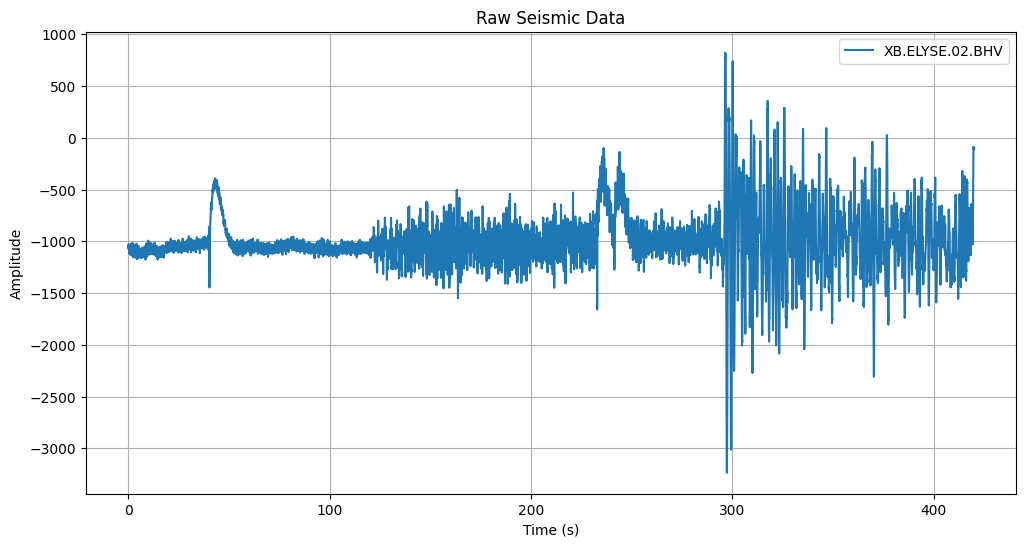

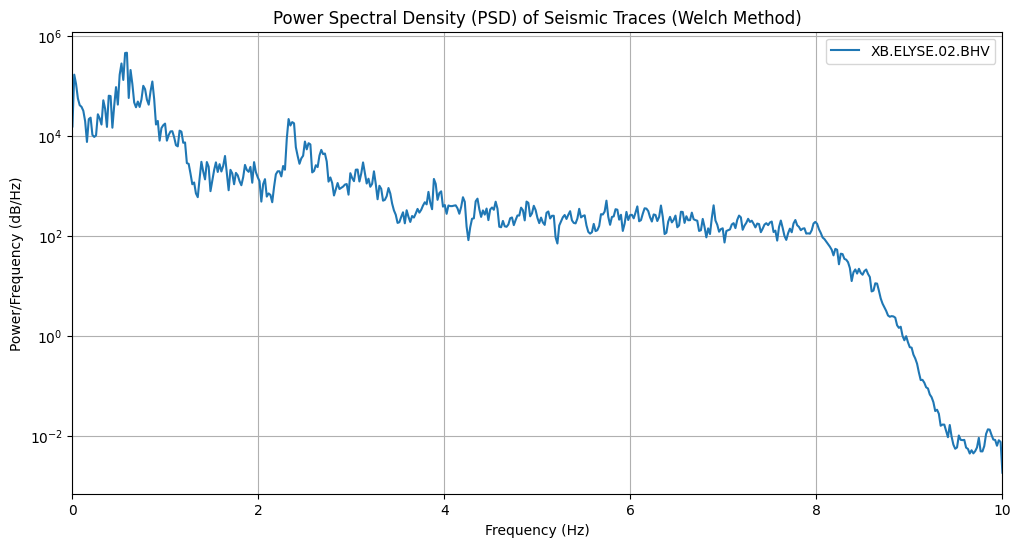

In [9]:
plt.figure(figsize=(12, 6))
for trace in st:
    plt.plot(trace.times(), trace.data, label=trace.id)

plt.title('Raw Seismic Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

def plot_psd(trace):
    data = trace.data
    sampling_rate = trace.stats.sampling_rate

    freqs, psd = welch(data, fs=sampling_rate, nperseg=1024)

    plt.semilogy(freqs, psd, label=trace.id)

plt.figure(figsize=(12, 6))
for trace in st:
    plot_psd(trace)

plt.title('Power Spectral Density (PSD) of Seismic Traces (Welch Method)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.xlim(0, 10)
plt.legend()
plt.grid()
plt.show()

In [10]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS")

start_time = UTCDateTime("2022-01-02")  # Set start time
end_time = UTCDateTime("2022-01-03")    # Set end time
network = "XB"                          # InSight network
station = "ELYSE"                       # Station code da ely feh el readings ely bndwr 3leha
location = "02"                         # e7na 3ayzen 02
channel = "BHW,BHV,BHU"                 # Retrieve channels -> all 3 components of the seismometer

In [11]:
waveforms = client.get_waveforms(network, station, location, channel, start_time,end_time)

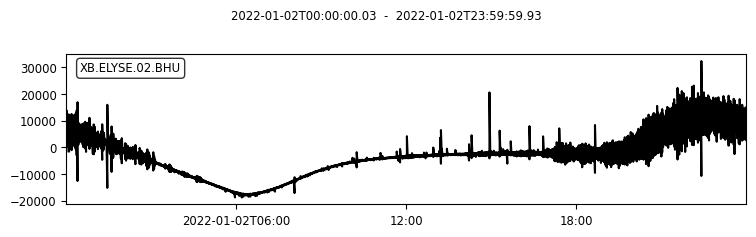

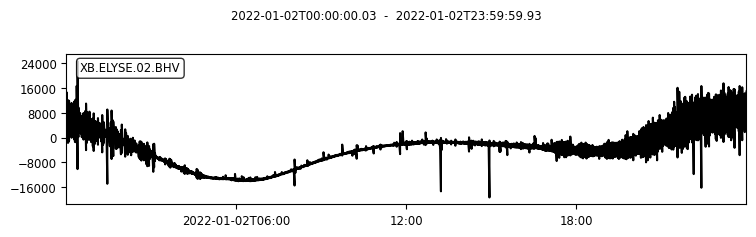

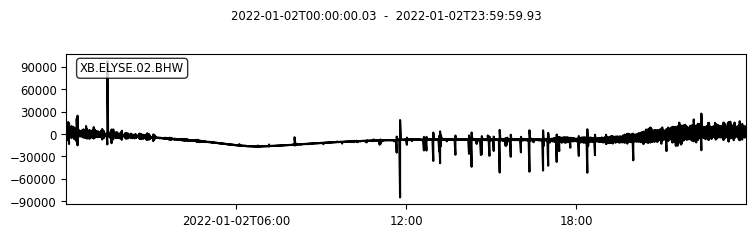

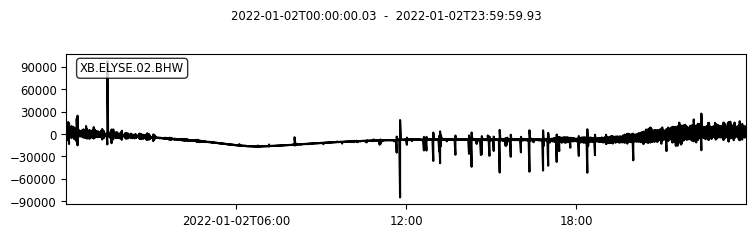

In [12]:
# Plot el data
waveforms[0].plot()
waveforms[1].plot()
waveforms[2].plot() # El zeft da byplot mrten mesh 3aref leh

In [ ]:
traces = waveforms[0:3]  # Get the 3 traces

In [ ]:
from obspy.signal.detrend import spline
traces[0].data = spline(traces[0].data, 3,20*60*60*2)
traces[1].data = spline(traces[1].data, 3,20*60*60*2)
traces[2].data = spline(traces[2].data, 3,20*60*60*2)

In [ ]:
trace1 = traces[2].slice( UTCDateTime("2022-01-02T04:00:00"),UTCDateTime("2022-01-02T05:00:00"))
trace2 = traces[2].slice( UTCDateTime("2022-01-02T20:00:00"),UTCDateTime("2022-01-02T21:00:00"))

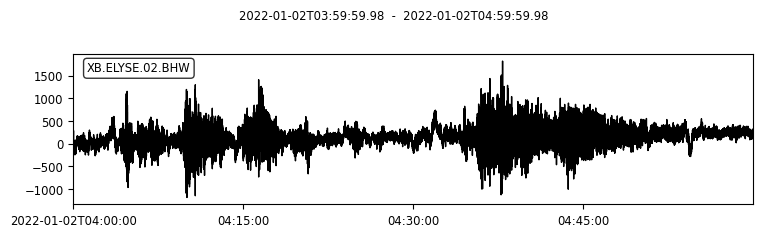

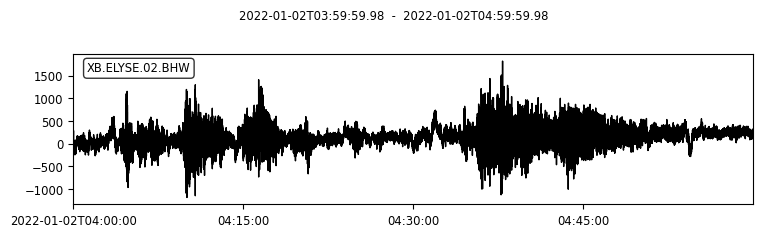

In [ ]:
trace1.plot()

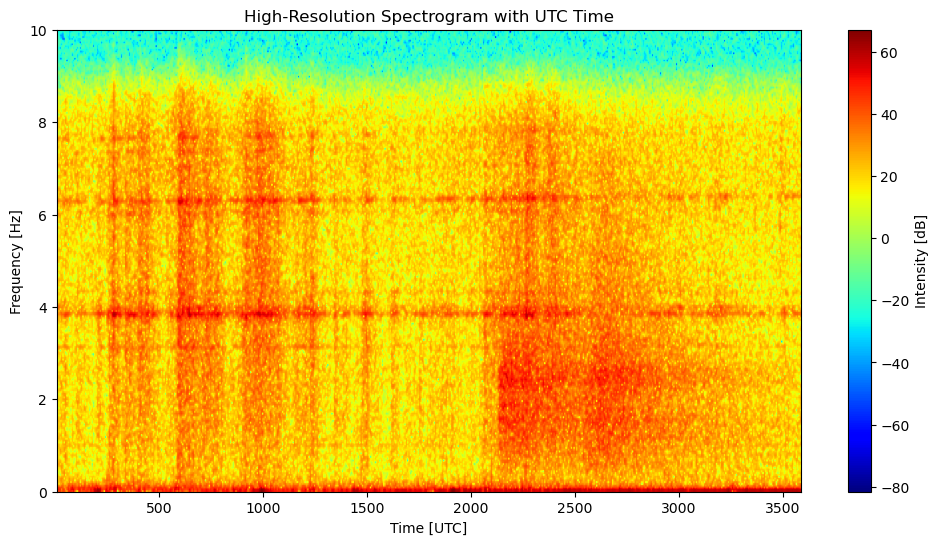

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Given variables
Fs = 20  # Sampling frequency (samples per second)
trace = traces[2]  # Your trace data
NFFT = 2**9  # FFT size for good frequency resolution
noverlap = NFFT * 0.75  # 75% overlap for smooth transitions
window = np.blackman(NFFT)  # Hanning window to reduce spectral leakage

# Plot the spectrogram with the time vector in UTC on the x-axis
plt.figure(figsize=(12, 6))
plt.specgram(trace1.data, NFFT=NFFT, Fs=Fs, noverlap=int(noverlap), window=window, scale_by_freq=True, cmap='jet')

# Adding labels and title
plt.xlabel('Time [UTC]')
plt.ylabel('Frequency [Hz]')
plt.title('High-Resolution Spectrogram with UTC Time')
plt.colorbar(label='Intensity [dB]')

# Show the plot
plt.show()


In [ ]:
from scipy.signal import medfilt
from scipy.signal import welch
from scipy.ndimage import gaussian_filter1d

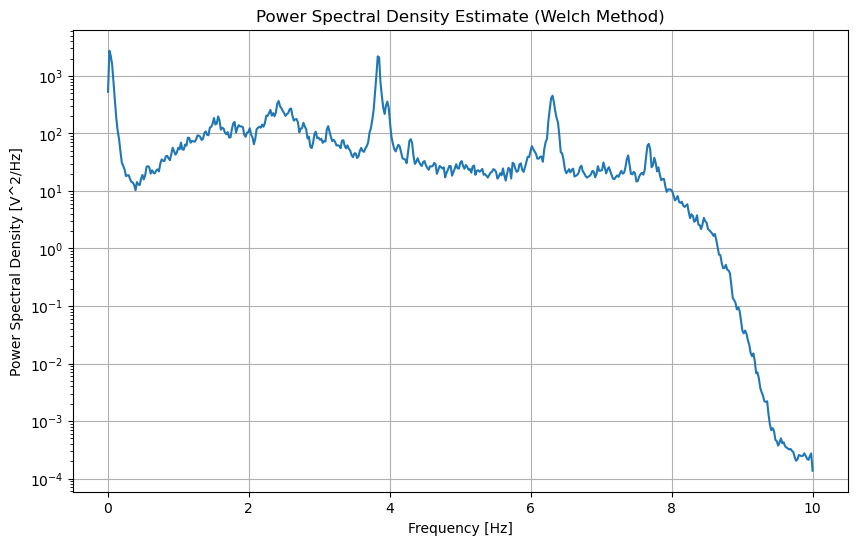

In [ ]:
f, Pxx = welch(trace1.data, fs=Fs, nperseg=2**10, window='hann', noverlap=2**10*.5,nfft=2**10,scaling='spectrum')
    # Plot the periodogram
plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx)  # Use semilogy for better visualization in log scale
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [V^2/Hz]')
plt.title('Power Spectral Density Estimate (Welch Method)')
plt.grid(True)
plt.show()

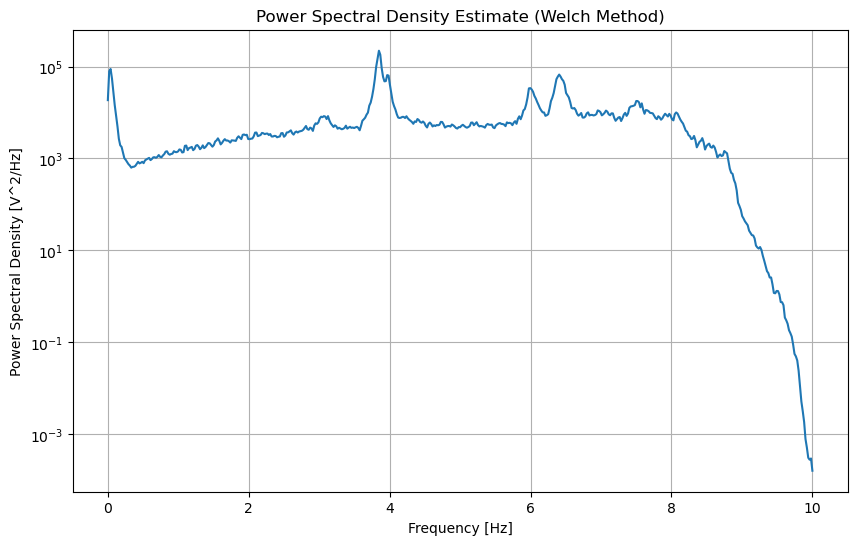

In [ ]:
f, Pxx = welch(trace2.data, fs=Fs, nperseg=2**10, window='hann', noverlap=2**10*.5,nfft=2**10,scaling='spectrum')
    # Plot the periodogram
plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx)  # Use semilogy for better visualization in log scale
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [V^2/Hz]')
plt.title('Power Spectral Density Estimate (Welch Method)')
plt.grid(True)
plt.show()

In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

# Initialize El client 3ashan ngeb mno el data
client = Client("IRIS")

# Parameteres
start_time = UTCDateTime("2022-01-02")  # Set start time
end_time = UTCDateTime("2022-01-03")    # Set end time
network = "XB"                          # InSight network
station = "ELYSE"                       # Station code da ely feh el readings ely bndwr 3leha
location = "02"                         # e7na 3ayzen 02
channel = "BHW,BHV,BHU"                 # Retrieve channels -> all 3 components of the seismometer